In [6]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

device = torch.device("cuda")
sam = sam_model_registry["vit_h"](checkpoint="Checkpoints/sam_vit_h_4b8939.pth").to(device=device)

In [7]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [8]:
import cv2
image=cv2.cvtColor(cv2.imread("Inputs/Graphic.jpg"),cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image)

In [9]:
largest = max(sam_result, key=lambda x : x['area'])
mask = largest['segmentation']

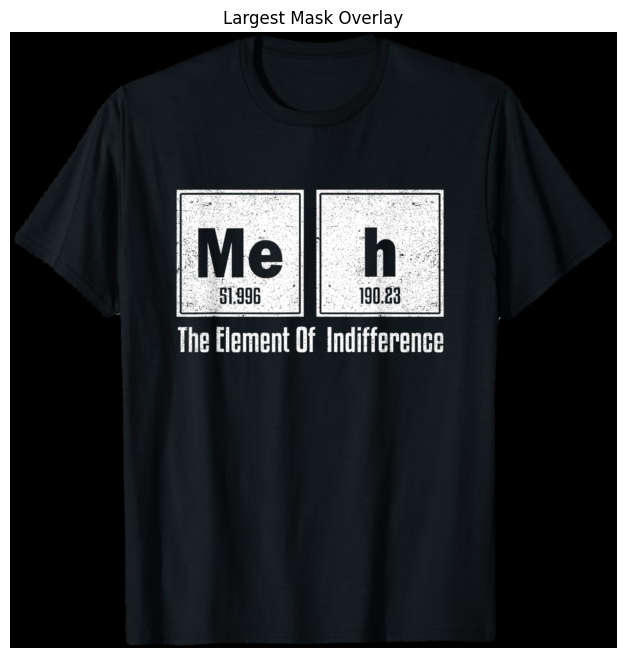

In [10]:
import matplotlib.pyplot as plt
import numpy as np

masked_mask = np.ma.masked_where(mask, mask)

plt.figure(figsize=(8, 8))
plt.imshow(image)  
plt.imshow(masked_mask, alpha=1, cmap="gray")

plt.title("Largest Mask Overlay")
plt.axis("off")

plt.show()


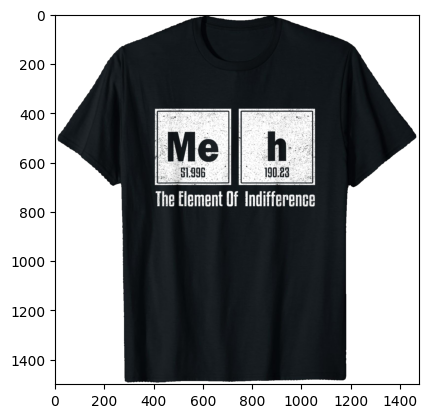

In [11]:
image_rgba = cv2.cvtColor(image,cv2.COLOR_RGB2RGBA)

image_rgba[~mask] = [0,0,0,0]

plt.imshow(image_rgba)
plt.show()